# K Means Clustering

In [32]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt
%matplotlib inline

In [33]:
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
cleaned_df = df.drop(columns=['sepal length (cm)', 'sepal width (cm)'])
cleaned_df

,petal length (cm),petal width (cm)
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2
...,...,...
145,5.2,2.3
146,5.0,1.9
147,5.2,2.0
148,5.4,2.3


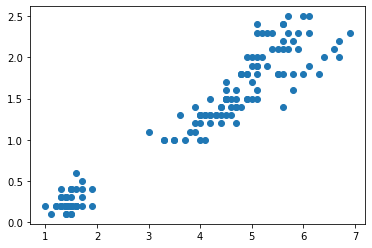

In [34]:
plt.scatter(cleaned_df['petal length (cm)'], cleaned_df['petal width (cm)'])

In [35]:
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df[['petal length (cm)','petal width (cm)']])
y_predicted

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [36]:
cleaned_df['cluster'] = y_predicted
cleaned_df.head()

,petal length (cm),petal width (cm),cluster
0,1.4,0.2,1
1,1.4,0.2,1
2,1.3,0.2,1
3,1.5,0.2,1
4,1.4,0.2,1


In [37]:
km.cluster_centers_

array([[4.26923077, 1.34230769],
       [1.462     , 0.246     ],
       [5.59583333, 2.0375    ]])

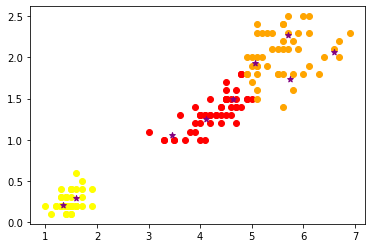

In [41]:
df1 = cleaned_df[cleaned_df.cluster==0]
df2 = cleaned_df[cleaned_df.cluster==1]
df3 = cleaned_df[cleaned_df.cluster==2]
plt.scatter(df1['petal length (cm)'], df1['petal width (cm)'], color= "red")
plt.scatter(df2['petal length (cm)'], df2['petal width (cm)'], color="yellow")
plt.scatter(df3['petal length (cm)'], df3['petal width (cm)'], color="orange")
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], marker="*", color="purple")


# Elbow plot

In [39]:
sse = []
k_rng = range(1, 10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(cleaned_df)
    sse.append(km.inertia_)
    

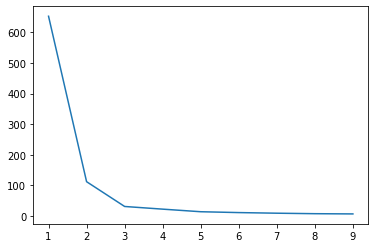

In [31]:
plt.plot(k_rng,sse)